# Python basics III

**Objectives:**

By the end of this tutorial you will be able to:
* Work with **Functions** in Python
* Understand and use **lambda** functions
* Calculate derivatives with **Sympy** library

**Submission:**
* *Not required*
* This file provides basics needed for P3_ErrorsCriteria.ipynb

**REF adapted from:**
* http://github.com/jrjohansson/scientific-python-lectures
* https://github.com/EXPLORE-for-students/python-tutorials

# Functions

Going back to our mathematical expression
```py
x**2 + 1
```
 we now want to evaluate it at an specific value, for instance `x = 3`. The result of this evaluation will be `10` 

In [30]:
x = 3
x**2 + 1

10

We  could do this also for another input number, for example `x = 7`.

In [31]:
x = 7
x**2 + 1

50

or `x = 50`

In [32]:
# TODO: repeat the above for x = 50
x = 50
x**2 + 1

2501

You get the idea. You can save your time by abstracting
```py
x**2 + 1
```
into a function which can be reused any time we desire to.

The syntax for defining a function in python is the following: 

```py
def function_name(x1):
    # ...
```
Here, `x1` is a function parameter (independent variable). It is recommended that you use functions names that accurately describe the function purpose.

You can have multiple function parameters.
```py
def f(x1, x2):
    # ...
```

The function parameters ` x ` can be of any type (including functions themselves).

A function generally takes an input and returns an output. Let us imagine we want to write a function that adds two parameters and squares them afterwards. You could write a code of the following form

In [33]:
def sum_and_square(x1, x2):
    power = 2
    s = x1 + x2
    s_sq = s**power
    return s_sq

We can now use this function with specific input variables as follows

In [34]:
x = sum_and_square(2, 3)
x

25

Let us take this example function to discuss __local variables__. As you can see, inside the function we have defined the variable  ` power = 2 `, that means inside the function, anywhere you encounter the variable ` power `, the program automatically replace its value `2`. However, outside the function the variable ` power ` is not defined, and if you try to call it, you will get an error message. ` power ` was written as a **local** variable. 

In [35]:
# TODO: Uncomment the line below and observe the error message
power

NameError: name 'power' is not defined

Python syntax for error printed is very informative, as we can see, it tells that the variable <code>power</code> has not been defined.

Returning to our  function. As you can see, the job of `return`  is to store the result of the operation in the function, in the variable `x`. A function doesn't need to have a `return` statement. 

Keep in mind, that the argument's types are carried into the function, so you get an error, when you try use undefined operations between different type objects. For example, the sum of a  string and a number is not defined, and the error would be the following 

In [ ]:
# TODO: Uncomment the line below and observe the error message
sum_and_square("hello", 2)

TypeError: can only concatenate str (not "int") to str

Let us finally comment on a useful feature when defining functions. You can pre-assign a default value for the independent variables. For instance, let us imagine we want to  define a function of two parameters ` a, b `, but we want to specify a default value for `b=1`, so that when using the function, it assumes that `b =1`, but we could change the value of `b` if desired.  The syntax for this will be 
```py
def fun(a,b=1):
    # ...
```
Here we refer to `b` as a named variable. Let us see how this works in the following example

In [ ]:
def fun(a,b=1):
    return a + b

In [ ]:
print(fun(3)) # use the default value for variable b
print(fun(3,9)) # specifiy the input value for b

4
12


Notice that the order of the arguments matters, unnamed variables always go first, and named variables go afterwards. For instance, if you want to invert the order, you will get an error message

In [ ]:
# TODO: Uncomment the line below and observe the error message
fun(b=1,3)

SyntaxError: positional argument follows keyword argument (962708309.py, line 2)

Defining function with default key-values for different parameters  is useful when dealing functions with a big number of  arguments, since it allows us to input the arguments without an specific order. For example

In [ ]:
def func2(a=1,b=3,c=19):
    # TODO: calculate an integer division of a-b divided by c
    return (a-b)//c

# TODO: call the function func2 to test the correctness of your code
func2(9,4,2)

2

In [ ]:
func2(b=3,a=13,c=19) == func2(b=3,c=19,a=13) 

True

# Unnamed functions (lambda function)

In Python we can also create unnamed functions, using the `lambda` keyword:

In [ ]:
power2 = lambda x: x**2

# is equivalent to

def f2(x):
    return x**2

In [ ]:
power2(2), f2(2)

(4, 4)

In [ ]:
# TODO: rewrite the sum_and_square function using lambda named it f3
f3 = lambda x,y : (x+y)**2

# TODO: use f3 to calculate sum_and_square(3,5)
f3(3,5)


64

This technique is useful for example when we want to pass a simple function as an argument to another function, like this:

In [ ]:
def f4(func,x1,x2):
    if (x:=x1+x2)%2==0:
        return func(x)
    else:
        return x**0.5 

f4(power2,2,3)

# TODO: run this block of code and add a comment to explain what it does
# call f4 then x1 + x2 = 5 = x and x is not even so use else condition to solve x power by 0.5 = answer

2.23606797749979

# Symbolic computation

First, we import the SymPy library. (We will also use `numpy` and `matplotlib.pyplot` in the examples below.)

The next step is to define the variables we will use for our calculations to follow. Here we use $t, x, y, z$.

In [36]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t, x, y, z = sp.symbols("t x y z")

With these variables, we can define mathematical expressions. SymPy has many [elementary functions](https://docs.sympy.org/latest/modules/functions/elementary.html) that are built-in and from which more complicated functions can be constructed.

For example, let's define a function

$$
f(x)=\cos(x)+1 
$$

In SymPy, this is defined as follows.

In [37]:
f = sp.cos(x) + 1

f

cos(x) + 1

We can evaluate a function $f$ at a given point. For example, suppose we want to calculate $f(0)$:

$$
f(x=0)=\cos(0)+1=2
$$

We perform a substitution replacing $x \to 0$, as follows.

In [38]:
f.subs(x, 0)

2

## Converting to numerical functions

The easiest way to convert a SymPy expression to an expression that can be numerically evaluated is to use the **lambdify** function. 

To convert our symbolic function $f(x)$ to a numerical one, we do the following:

```py
f_num = sp.lambdify(x,f)
```

Note that we need pass our symbolic function `f` as well as the variable that will be evaluated numerically, namely $x$. Now, we have a numerical function `f_num` that can be evaluated numerically in the same way as you would normally do.

In [39]:
f_num = sp.lambdify(x, f)

Now, let's define an array of $x$ values and evaluate the function at those values numerically.

In [40]:
x_arr = np.arange(0., 10, 0.75) 
f_num(x_arr)

array([2.        , 1.73168887, 1.0707372 , 0.37182638, 0.0100075 ,
       0.17944064, 0.7892042 , 1.51208548, 1.96017029, 1.89300634,
       1.34663532, 0.61425206, 0.08886974, 0.0524202 ])

In [43]:
# TODO: apply f_num to every 3 elements in x_arr starting with the very first one
result = f_num(x_arr[::3])
print(result)


[2.         0.37182638 0.7892042  1.89300634 0.08886974]


We can plot these numerical values in the usual way.

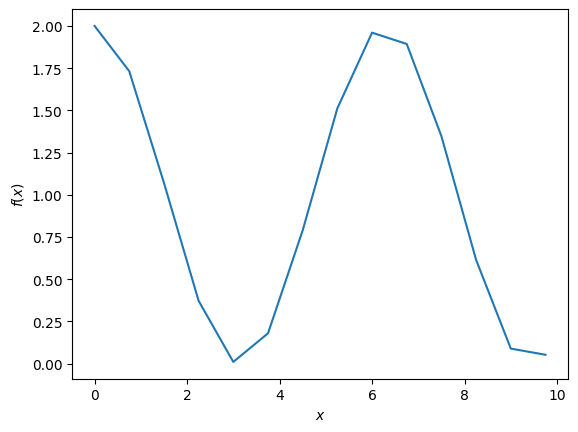

In [44]:
plt.plot(x_arr, f_num(x_arr))
plt.xlabel(r"$x$")
plt.ylabel(r'$f(x)$')
plt.show()

## Differentiation

SymPy can compute derivatives of functions. Consider the example

$$
\frac{\text{d}}{\text{d}t} \cos(t) = -\sin(t)
$$

In SymPy, this is done as follows using `sp.diff(f,t)` where `f` is the function we want to differentiate with respect to `t`.

In [45]:
sp.diff(sp.cos(t), t) 

-sin(t)

Differentiation can also be performed using the syntax `f.diff(t)`. Consider this example:

$$
\frac{\text{d}}{\text{d}t} \cos^2(t) =-2\sin(t)\cos(t)
$$

We can perform this as:

In [47]:
f = sp.cos(t)**2

f.diff(t)

-2*sin(t)*cos(t)

For taking a higher-order derivative, we can do it in two ways:
* Repeatedly apply the 'diff(t)' function
* Use the syntax `f.diff(t,n)` where `n` is the number of derivatives taken with respect to `t`. 

Let's try both, suppose we want to compute

$$
\frac{\text{d}^2}{\text{d}t^2} \cos^2(t) = 2 (\sin^2(t)-\cos^2(t))
$$


In [ ]:
# TODO: compute the above 2nd derivative using diff(t)
f.diff(t)

# TODO: compute the above 2nd derivative using diff(t,n)
f.diff(t,2)

8*sin(t)*cos(t)